In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [3]:
from pathlib import Path
path = Path("/Smart Ad/UTKFace")

In [4]:
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


Data Preprocessing

In [16]:
#Shuffle the data to increase the randomness of data (remove biasness)
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels,race_labels, image_path = [], [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])
    race_labels.append(temp[2])

In [17]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'],df['race'] = image_path, age_labels, gender_labels, race_labels

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  object
 2   gender  23708 non-null  object
 3   race    23708 non-null  object
dtypes: object(4)
memory usage: 741.0+ KB


In [19]:
df.head()

,image,age,gender,race
0,18_1_3_20170117135709510.jpg.chip.jpg,18,1,3
1,34_0_3_20170119200819270.jpg.chip.jpg,34,0,3
2,26_0_1_20170113135304305.jpg.chip.jpg,26,0,1
3,34_0_0_20170117123737793.jpg.chip.jpg,34,0,0
4,29_1_0_20170103175359824.jpg.chip.jpg,29,1,0
5,50_0_1_20170113135543842.jpg.chip.jpg,50,0,1
6,50_0_3_20170113190305936.jpg.chip.jpg,50,0,3
7,2_1_2_20161219141042280.jpg.chip.jpg,2,1,2
8,28_0_1_20170109012501213.jpg.chip.jpg,28,0,1
9,78_1_1_20170120225425945.jpg.chip.jpg,78,1,1


In [20]:
df['race'].value_counts()

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170109150557335.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
20170116174525125.jpg.chip.jpg        1
Name: race, dtype: int64

In [21]:
indian_race_label = '3'
# Keep only race 3
df = df[df['race'] == indian_race_label]

# Check the number of instances for race 3
df['race'].value_counts()

3    3975
Name: race, dtype: int64

In [22]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3975 non-null   object
 1   age     3975 non-null   object
 2   gender  3975 non-null   object
 3   race    3975 non-null   object
dtypes: object(4)
memory usage: 155.3+ KB


,image,age,gender,race
count,3975,3975,3975,3975
unique,3975,87,2,1
top,18_1_3_20170117135709510.jpg.chip.jpg,26,0,3
freq,1,488,2261,3975


In [23]:
gender_dict = {0:"Male",1:"Female"}

In [24]:
df.dtypes

image     object
age       object
gender    object
race      object
dtype: object

In [25]:
df['gender'] = df['gender'].astype('int64')
df['age'] = df['age'].astype('int64')
df['race'] = df['race'].astype('int64')
df.dtypes

image     object
age        int64
gender     int64
race       int64
dtype: object

In [26]:
df.head()

,image,age,gender,race
0,18_1_3_20170117135709510.jpg.chip.jpg,18,1,3
1,34_0_3_20170119200819270.jpg.chip.jpg,34,0,3
6,50_0_3_20170113190305936.jpg.chip.jpg,50,0,3
11,23_0_3_20170119163841604.jpg.chip.jpg,23,0,3
36,32_0_3_20170117182128437.jpg.chip.jpg,32,0,3
47,37_1_3_20170119193409372.jpg.chip.jpg,37,1,3
49,30_0_3_20170117181147603.jpg.chip.jpg,30,0,3
51,34_1_3_20170119163642029.jpg.chip.jpg,34,1,3
53,36_0_3_20170119194743443.jpg.chip.jpg,36,0,3
57,2_0_3_20161219224852040.jpg.chip.jpg,2,0,3


In [27]:
#Reset the indexing.. serialized it to include only indian race
df = df.reset_index(drop=True)
df.head()

,image,age,gender,race
0,18_1_3_20170117135709510.jpg.chip.jpg,18,1,3
1,34_0_3_20170119200819270.jpg.chip.jpg,34,0,3
2,50_0_3_20170113190305936.jpg.chip.jpg,50,0,3
3,23_0_3_20170119163841604.jpg.chip.jpg,23,0,3
4,32_0_3_20170117182128437.jpg.chip.jpg,32,0,3


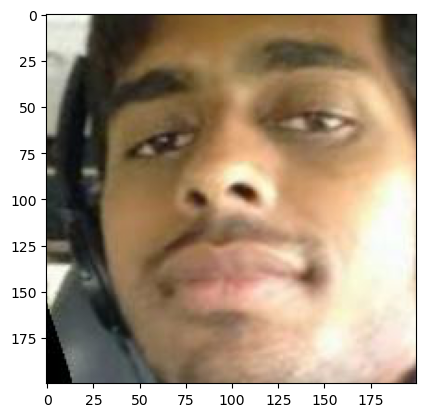

In [28]:
img = Image.open("/Smart Ad/UTKFace/"+df['image'][3])
plt.imshow(img)


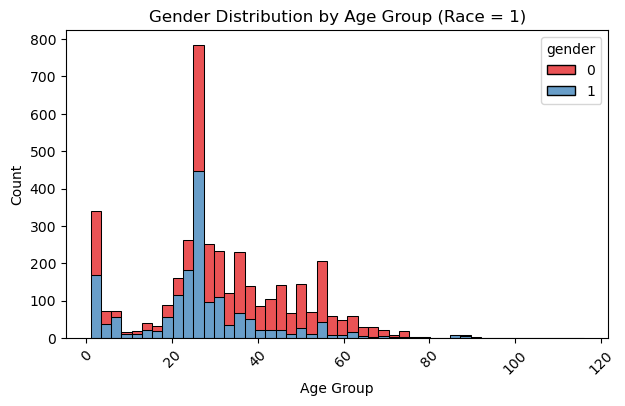

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot for gender distribution by age group
plt.figure(figsize=(7, 4))

# Use seaborn to create a bar plot
sns.histplot(
    data=df, 
    x='age', 
    hue='gender',  # Color code by gender
    multiple='stack',  # Stack the bars
    palette='Set1',  # Color palette
)

# Set plot title and labels
plt.title('Gender Distribution by Age Group (Race = 1)')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [30]:
df.head()

,image,age,gender,race
0,18_1_3_20170117135709510.jpg.chip.jpg,18,1,3
1,34_0_3_20170119200819270.jpg.chip.jpg,34,0,3
2,50_0_3_20170113190305936.jpg.chip.jpg,50,0,3
3,23_0_3_20170119163841604.jpg.chip.jpg,23,0,3
4,32_0_3_20170117182128437.jpg.chip.jpg,32,0,3
5,37_1_3_20170119193409372.jpg.chip.jpg,37,1,3
6,30_0_3_20170117181147603.jpg.chip.jpg,30,0,3
7,34_1_3_20170119163642029.jpg.chip.jpg,34,1,3
8,36_0_3_20170119194743443.jpg.chip.jpg,36,0,3
9,2_0_3_20161219224852040.jpg.chip.jpg,2,0,3


In [32]:
df = df[(df['age'] > 2) & (df['age'] < 71)]
# df.head(10)

In [41]:
df = df.reset_index(drop=True)
df

,image,age,gender,race
0,18_1_3_20170117135709510.jpg.chip.jpg,18,1,3
1,34_0_3_20170119200819270.jpg.chip.jpg,34,0,3
2,50_0_3_20170113190305936.jpg.chip.jpg,50,0,3
3,23_0_3_20170119163841604.jpg.chip.jpg,23,0,3
4,32_0_3_20170117182128437.jpg.chip.jpg,32,0,3
...,...,...,...,...
3607,56_1_3_20170104235453123.jpg.chip.jpg,56,1,3
3608,5_0_3_20161220222937859.jpg.chip.jpg,5,0,3
3609,28_1_3_20170119144214613.jpg.chip.jpg,28,1,3
3610,30_1_3_20170117181327196.jpg.chip.jpg,30,1,3


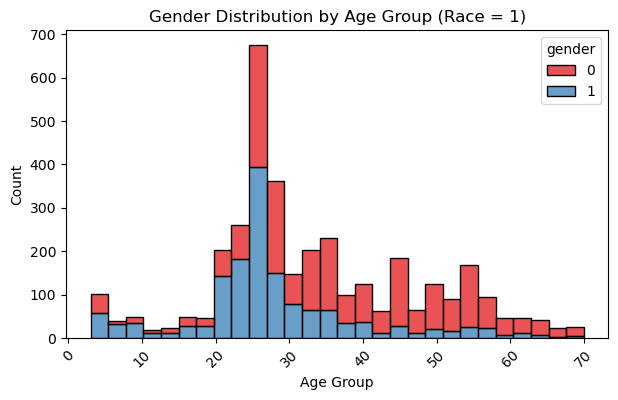

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot for gender distribution by age group
plt.figure(figsize=(7, 4))

# Use seaborn to create a bar plot
sns.histplot(
    data=df, 
    x='age', 
    hue='gender',  # Color code by gender
    multiple='stack',  # Stack the bars
    palette='Set1',  # Color palette
)

# Set plot title and labels
plt.title('Gender Distribution by Age Group (Race = 1)')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [48]:
import pandas as pd
from PIL import Image
import os

def convert_image(image_path, size=(224, 224)):
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        img = img.resize(size)
    return img

# making a copy of original df dataframe which contains images in jpg format
jpg_df = df.copy()

# Create a new column for PIL images
df['pil_image'] = None

# Specify the directory where your images are stored
dataset_dir = '/Smart Ad/UTKFace'

In [49]:
for index, row in df.iterrows():
    image_filename = row['image']
    image_path = os.path.join(dataset_dir, image_filename)
    
    if os.path.exists(image_path):
        pil_image = convert_image(image_path)
        df.at[index, 'pil_image'] = pil_image
    else:
        print(f"Warning: Image file not found: {image_path}")

In [55]:
pd.set_option('display.max_colwidth', None)
df['pil_image'] 

0       <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDBBDFA510>
1       <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC130F3D0>
2       <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC14AADD0>
3       <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC19F21D0>
4       <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDBBDC1B10>
                                     ...                              
3607    <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED6D0>
3608    <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED850>
3609    <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED9D0>
3610    <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0EDB50>
3611    <PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0EDCD0>
Name: pil_image, Length: 3612, dtype: object

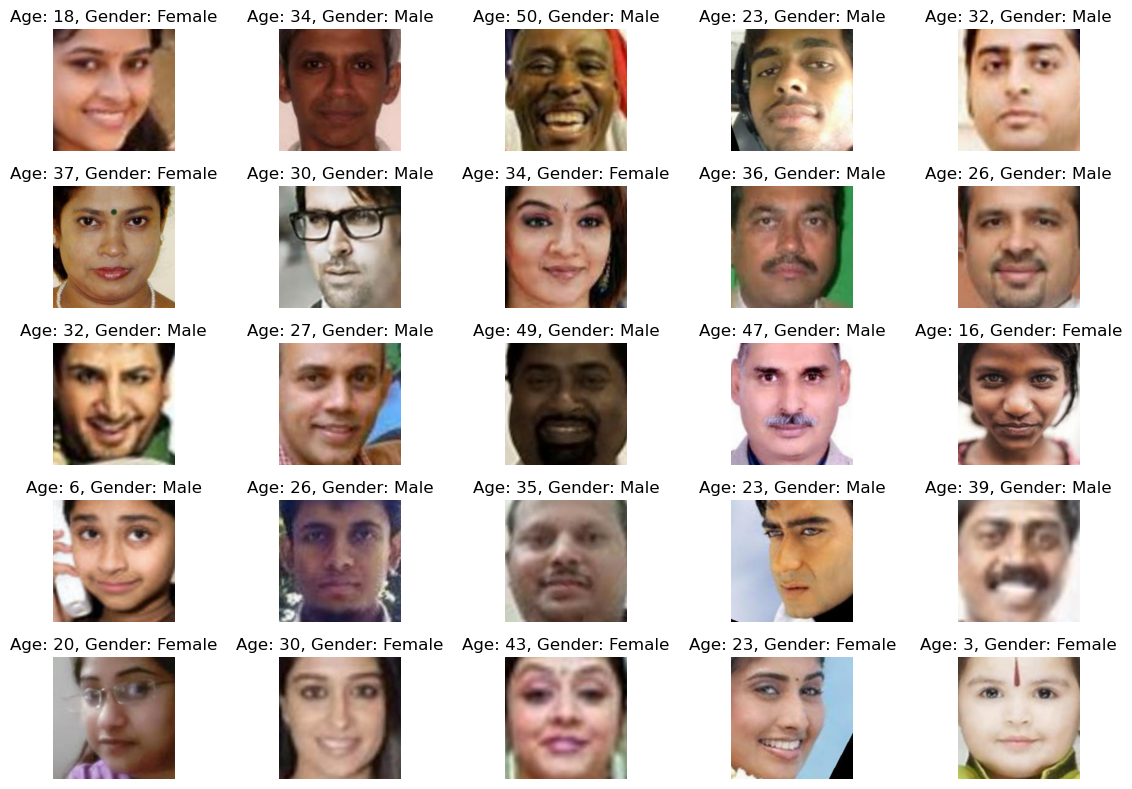

In [51]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 25

# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 8))

# Loop over the first 25 images in the dataframe
for i, ax in enumerate(axes.flat):
    if i < len(df):
        example = df.iloc[i]

        # Extract image, age cluster, and gender
        image = example['pil_image']  # This is already a PIL image
        age = example['age']  # Predicted age cluster
        gender = example['gender']  # Gender (0 = Male, 1 = Female)
        
        # Display the image
        ax.imshow(image)
        ax.set_title(f"Age: {age}, Gender: {'Male' if gender == 0 else 'Female'}")
        ax.axis('off')  # Hide the axes
    else:
        # Hide the axes if there are no more images to show
        ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [56]:
# remove the original 'image' column
df = df.drop(columns=['image'])

In [57]:
df

,age,gender,race,pil_image
0,18,1,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDBBDFA510>
1,34,0,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC130F3D0>
2,50,0,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC14AADD0>
3,23,0,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC19F21D0>
4,32,0,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDBBDC1B10>
...,...,...,...,...
3607,56,1,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED6D0>
3608,5,0,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED850>
3609,28,1,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED9D0>
3610,30,1,3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0EDB50>


In [59]:
df = df[['pil_image', 'age', 'gender', 'race']]

In [61]:
df = df.rename(columns={'pil_image': 'image'})
df

,image,age,gender,race
0,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDBBDFA510>,18,1,3
1,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC130F3D0>,34,0,3
2,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC14AADD0>,50,0,3
3,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDC19F21D0>,23,0,3
4,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDBBDC1B10>,32,0,3
...,...,...,...,...
3607,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED6D0>,56,1,3
3608,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED850>,5,0,3
3609,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0ED9D0>,28,1,3
3610,<PIL.Image.Image image mode=RGB size=224x224 at 0x1DDDF0EDB50>,30,1,3


In [63]:
# Save the filtered dataframe to a CSV file
df.to_csv('UTKFaceFilteredDataset.csv', index=False)